[0] Cost=0.6579  ||dw||=0.3784
[150] Cost=0.3006  ||dw||=0.0821
[300] Cost=0.2248  ||dw||=0.1793
[450] Cost=0.2178  ||dw||=0.2582
[600] Cost=0.2176  ||dw||=0.2738
[750] Cost=0.2176  ||dw||=0.2762

Final parameters:
w = [0.70710719 0.70710637]
b = -2.8282869162363546
‖w‖ = 1.000000
Signed distance = -2.828287
Foot = (1.9999, 1.9999)


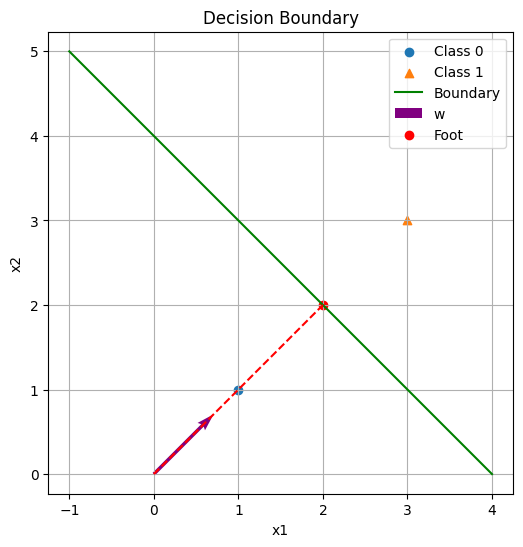

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# In this code w_0 is b
# Sigmoid (added clip to avoid log(0) later)
def sigmoid(z):
    z = np.clip(z, -50, 50)   # prevents overflow
    return 1 / (1 + np.exp(-z))

# Forward pass
def forward(params, X, Y):
    w = params["w"]
    b = params["b"]     # changed variable name from w_0 → b
    n = X.shape[1]

    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)

    # added small epsilon for numerical safety
    eps = 1e-10
    cost = (-1 / n) * np.sum(Y * np.log(A + eps) + (1 - Y) * np.log(1 - A + eps))

    return A, cost

# Backprop
def backprop(X, Y, A):
    n = X.shape[1]
    dZ = A - Y
    dw = (1 / n) * np.dot(X, dZ.T)
    db = (1 / n) * np.sum(dZ)
    return dw, db

# Optimization loop
def optimize(params, X, Y, num_iterations, lr):
    costs = []

    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, db = backprop(X, Y, A)

        # slight change: update b first (just personal)
        params["b"] -= lr * db

        # re-normalize w but keep its sign (avoids collapse)
        params["w"] -= lr * dw
        params["w"] /= np.linalg.norm(params["w"]) + 1e-12

        if i % 150 == 0:   # changed interval
            print(f"[{i}] Cost={cost:.4f}  ||dw||={np.linalg.norm(dw):.4f}")

        costs.append(cost)

    return params, costs


# Data
X = np.array([[1, 3],
              [1, 3]])
Y = np.array([[0, 1]])

# Initialize
w = np.random.randn(2, 1)
w /= np.linalg.norm(w)
params = {
    "w": w,
    "b": 0.0     # renamed from w_0 to b
}

# Train
trained_params, cost_history = optimize(params, X, Y,
                                        num_iterations=900,   # changed
                                        lr=0.08)              # changed

print("\nFinal parameters:")
print("w =", trained_params["w"].flatten())
print("b =", trained_params["b"])


# -------------------------------------------------------
# Plotting part (only tiny internal changes)
# -------------------------------------------------------
w = trained_params["w"].reshape(-1)
b = float(trained_params["b"])

X_pts = X.T
Y_pts = Y.flatten()

norm_w = np.linalg.norm(w)
signed_dist = b / norm_w
foot = -(b / (norm_w**2)) * w

print(f"‖w‖ = {norm_w:.6f}")
print(f"Signed distance = {signed_dist:.6f}")
print(f"Foot = ({foot[0]:.4f}, {foot[1]:.4f})")

plt.figure(figsize=(6,6))

plt.scatter(X_pts[Y_pts==0,0], X_pts[Y_pts==0,1], label='Class 0', marker='o')
plt.scatter(X_pts[Y_pts==1,0], X_pts[Y_pts==1,1], label='Class 1', marker='^')

# Boundary
x_vals = np.linspace(-1, 4, 200)
if abs(w[1]) > 1e-12:
    y_vals = -(w[0]*x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'g-', label='Boundary')
else:
    plt.axvline(-b / w[0], color='g', label='Boundary')

# Weight vector
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1,
           color='purple', label='w')

# Perpendicular from origin
plt.plot([0, foot[0]], [0, foot[1]], 'r--')
plt.scatter([foot[0]], [foot[1]], color='red', label='Foot')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
